In [29]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from scipy import interpolate 
from scipy import stats

In [30]:
#data import
file_sst = 'sst.csv'
file_diatom ='diatom_data.csv'
file_so4 = 'so4_data.csv'

dia_df = pd.read_csv(file_diatom)
display(dia_df)

sst_df = pd.read_csv(file_sst)
display(sst_df)

so4_df = pd.read_csv(file_so4)
display(so4_df)

,Depth sed [m],Age [ka BP],Age [a AD/CE],A. baicalensis [%],A. skvortzowii [%],Synedra spp. [%],C. minuta [%],C. inconspicua [%],S. meyeri [%],TDVA [10**6 #/g],DDI,Reference
0,0.0010,-0.063,2013,33.44,8.85,13.44,27.87,0.00,0.33,3.5288,0.19,Roberts et al (2018)
1,0.0030,-0.061,2011,33.66,8.82,17.65,26.80,0.00,0.33,3.1649,0.20,Roberts et al (2018)
2,0.0050,-0.059,2009,34.05,9.26,11.57,30.74,0.00,0.66,1.7890,0.19,Roberts et al (2018)
3,0.0070,-0.056,2006,27.50,13.42,12.11,31.42,0.65,0.00,1.4893,0.16,Roberts et al (2018)
4,0.0090,-0.053,2003,25.40,10.36,13.59,25.89,0.00,2.27,2.5340,0.21,Roberts et al (2018)
5,0.0110,-0.048,1998,33.77,10.87,6.59,40.53,0.00,0.00,2.7790,0.22,Roberts et al (2018)
6,0.0127,-0.044,1994,33.85,11.50,5.75,31.64,4.42,2.88,0.9847,0.63,Mackay et al (1998)
7,0.0130,-0.043,1993,31.68,13.53,6.44,29.04,0.99,1.32,4.1937,0.20,Roberts et al (2018)
8,0.0140,-0.040,1990,36.20,13.29,7.77,26.38,2.86,4.91,2.0257,0.57,Mackay et al (1998)
9,0.0150,-0.037,1987,33.39,12.33,11.13,26.03,1.37,3.08,3.4299,0.17,Roberts et al (2018)


,lat,lon,time,sst,year,month,week,dayofyear
0,54.625,100.125,1981-09-01T00:00:00.000Z,NaN,1981.0,9.0,36.0,244.0
1,54.625,100.375,1981-09-01T00:00:00.000Z,NaN,1981.0,9.0,36.0,244.0
2,54.625,100.625,1981-09-01T00:00:00.000Z,NaN,1981.0,9.0,36.0,244.0
3,54.625,100.875,1981-09-01T00:00:00.000Z,NaN,1981.0,9.0,36.0,244.0
4,54.625,101.125,1981-09-01T00:00:00.000Z,NaN,1981.0,9.0,36.0,244.0
...,...,...,...,...,...,...,...,...
592275,52.125,104.125,1982-10-20T00:00:00.000Z,NaN,1982.0,10.0,43.0,293.0
592276,52.125,104.375,1982-10-20T00:00:00.000Z,NaN,1982.0,10.0,43.0,293.0
592277,52.125,104.625,1982-10-20T00:00:00.000Z,NaN,1982.0,10.0,43.0,293.0
592278,52.125,104.875,1982-10-20T00:00:00.000Z,NaN,1982.0,10.0,43.0,293.0


,Depth water [m],Date/Time,Date/time end,[SO4]2- [mg/l]
0,0,1967,1968,3.9
1,10,1967,1968,4.4
2,25,1967,1968,4.1
3,50,1967,1968,3.8
4,100,1967,1968,3.9
...,...,...,...,...
72,800,2004,2005,5.5
73,900,2004,2005,6.2
74,1000,2004,2005,5.7
75,1100,2004,2005,5.6


In [31]:
#Cutting the diatom measurements down to match the dates of the sulfate measurements
dia_df_short = dia_df.loc[dia_df["Age [a AD/CE]"] > 1960]
display(dia_df_short)

#Averaging the sulfate concetration measurement to be from 0-200m, the photic layer, so only the sulfate concentration affecting the diatoms is shown
#separating the orginal df to only include up to 200m
so4_df = so4_df.loc[so4_df['Depth water [m]'] < 201]
display(so4_df)

#split each time period into chunks and then averaged the sulfate concentration
so4_avg1 = so4_df['[SO4]2- [mg/l]'].loc[0:5].mean()
so4_avg2 = so4_df['[SO4]2- [mg/l]'].loc[17:22].mean()
so4_avg3 = so4_df['[SO4]2- [mg/l]'].loc[28:33].mean()
so4_avg4 = so4_df['[SO4]2- [mg/l]'].loc[44:49].mean()
so4_avg5 = so4_df['[SO4]2- [mg/l]'].loc[61:].mean()

#created a new array with averaged so4 concentrations and respective dates
so4conc = np.array([[1967, so4_avg1], [1981, so4_avg2], [1983, so4_avg3], [1986, so4_avg4], [2004, so4_avg5]])

#turned that array into a dataframe ready to be plotted
so4_final = pd.DataFrame(so4conc, columns =['Date Start', 'Average [SO4]2- [mg/l]'])
display(so4_final)

,Depth sed [m],Age [ka BP],Age [a AD/CE],A. baicalensis [%],A. skvortzowii [%],Synedra spp. [%],C. minuta [%],C. inconspicua [%],S. meyeri [%],TDVA [10**6 #/g],DDI,Reference
0,0.0010,-0.063,2013,33.44,8.85,13.44,27.87,0.00,0.33,3.5288,0.19,Roberts et al (2018)
1,0.0030,-0.061,2011,33.66,8.82,17.65,26.80,0.00,0.33,3.1649,0.20,Roberts et al (2018)
2,0.0050,-0.059,2009,34.05,9.26,11.57,30.74,0.00,0.66,1.7890,0.19,Roberts et al (2018)
3,0.0070,-0.056,2006,27.50,13.42,12.11,31.42,0.65,0.00,1.4893,0.16,Roberts et al (2018)
4,0.0090,-0.053,2003,25.40,10.36,13.59,25.89,0.00,2.27,2.5340,0.21,Roberts et al (2018)
5,0.0110,-0.048,1998,33.77,10.87,6.59,40.53,0.00,0.00,2.7790,0.22,Roberts et al (2018)
6,0.0127,-0.044,1994,33.85,11.50,5.75,31.64,4.42,2.88,0.9847,0.63,Mackay et al (1998)
7,0.0130,-0.043,1993,31.68,13.53,6.44,29.04,0.99,1.32,4.1937,0.20,Roberts et al (2018)
8,0.0140,-0.040,1990,36.20,13.29,7.77,26.38,2.86,4.91,2.0257,0.57,Mackay et al (1998)
9,0.0150,-0.037,1987,33.39,12.33,11.13,26.03,1.37,3.08,3.4299,0.17,Roberts et al (2018)


,Depth water [m],Date/Time,Date/time end,[SO4]2- [mg/l]
0,0,1967,1968,3.9
1,10,1967,1968,4.4
2,25,1967,1968,4.1
3,50,1967,1968,3.8
4,100,1967,1968,3.9
5,200,1967,1968,3.8
17,0,1981,1982,4.8
18,10,1981,1982,4.8
19,25,1981,1982,4.9
20,50,1981,1982,5.3


,Date Start,Average [SO4]2- [mg/l]
0,1967.0,3.983333
1,1981.0,4.983333
2,1983.0,4.900000
3,1986.0,6.933333
4,2004.0,5.566667


In [41]:

#indexing all needed variable for conciseness
so4_final_date = so4_final['Date Start']
so4_final_conc = so4_final['Average [SO4]2- [mg/l]']

dates_dia_tot = dia_df_short['Age [a AD/CE]']
dates_dia = dates_dia_tot[1950:2005]
dia_tot = dia_df_short['TDVA [10**6 #/g]']
dia_need = dia_tot[1950:2005]

dia_ab = dia_df_short['A. baicalensis [%]']
dia_as = dia_df_short['A. skvortzowii [%]']
dia_ss = dia_df_short['Synedra spp. [%]']
dia_cm = dia_df_short['C. minuta [%]']
dia_ci = dia_df_short['C. inconspicua [%]']
dia_sm = dia_df_short['S. meyeri [%]']

#interpolating missing values for A. skvortzowii
dia_inds = np.where(dia_df['Age [a AD/CE]'].notnull()) 
x = dia_df.loc[dia_inds, 'Age [a AD/CE]']
y = dia_df.loc[dia_inds, 'A. skvortzowii [%]']
func = interpolate.interp1d(x, y, kind='linear', fill_value = 'extrapolate')
dia_df['as_interp'] = func(dia_df['Age [a AD/CE]'])
display(dia_df)
dia_interp_short = dia_df.loc[dia_df["Age [a AD/CE]"] > 1960]
dia_as_interp = dia_interp_short['A. skvortzowii [%]']
display(dia_as_interp)




,Depth sed [m],Age [ka BP],Age [a AD/CE],A. baicalensis [%],A. skvortzowii [%],Synedra spp. [%],C. minuta [%],C. inconspicua [%],S. meyeri [%],TDVA [10**6 #/g],DDI,Reference,as_interp
0,0.0010,-0.063,2013,33.44,8.85,13.44,27.87,0.00,0.33,3.5288,0.19,Roberts et al (2018),8.85
1,0.0030,-0.061,2011,33.66,8.82,17.65,26.80,0.00,0.33,3.1649,0.20,Roberts et al (2018),8.82
2,0.0050,-0.059,2009,34.05,9.26,11.57,30.74,0.00,0.66,1.7890,0.19,Roberts et al (2018),9.26
3,0.0070,-0.056,2006,27.50,13.42,12.11,31.42,0.65,0.00,1.4893,0.16,Roberts et al (2018),13.42
4,0.0090,-0.053,2003,25.40,10.36,13.59,25.89,0.00,2.27,2.5340,0.21,Roberts et al (2018),10.36
5,0.0110,-0.048,1998,33.77,10.87,6.59,40.53,0.00,0.00,2.7790,0.22,Roberts et al (2018),10.87
6,0.0127,-0.044,1994,33.85,11.50,5.75,31.64,4.42,2.88,0.9847,0.63,Mackay et al (1998),11.50
7,0.0130,-0.043,1993,31.68,13.53,6.44,29.04,0.99,1.32,4.1937,0.20,Roberts et al (2018),13.53
8,0.0140,-0.040,1990,36.20,13.29,7.77,26.38,2.86,4.91,2.0257,0.57,Mackay et al (1998),13.29
9,0.0150,-0.037,1987,33.39,12.33,11.13,26.03,1.37,3.08,3.4299,0.17,Roberts et al (2018),12.33


0      8.85
1      8.82
2      9.26
3     13.42
4     10.36
5     10.87
6     11.50
7     13.53
8     13.29
9     12.33
10    11.95
11    12.21
12    10.57
13      NaN
14    14.76
15    11.33
Name: A. skvortzowii [%], dtype: float64

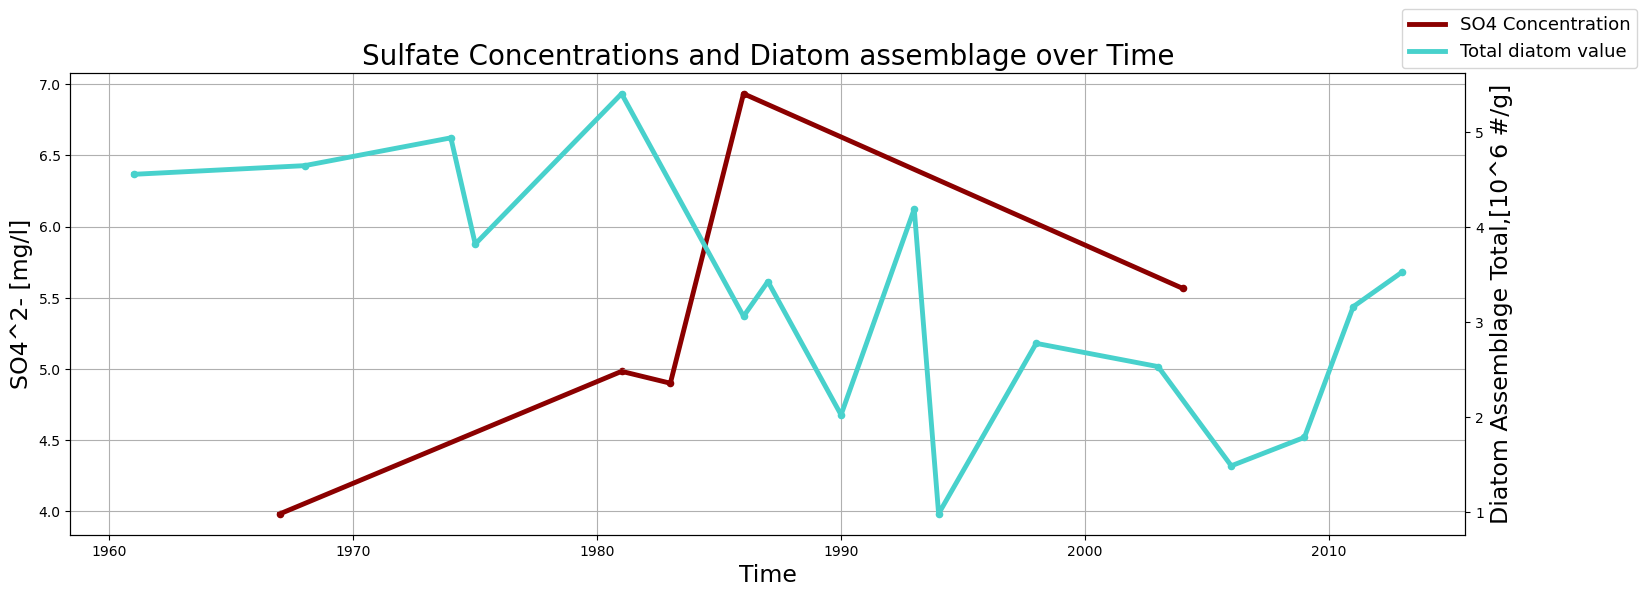

In [15]:
#two y axes https://www.statology.org/matplotlib-two-y-axes/

fig,ax = plt.subplots(figsize=(18,6))

ax2 = ax.twinx()

ax2.plot(dates_dia_tot, dia_tot, c='mediumturquoise', linestyle='-', linewidth=3.5, marker=None, label= 'Total diatom value')
ax.plot(so4_final_date, so4_final_conc, c='darkred', linestyle='-', linewidth=3.5, marker=None,label = 'SO4 Concentration')

ax2.scatter(dates_dia_tot, dia_tot, s=20, c='mediumturquoise')
ax.scatter(so4_final_date, so4_final_conc, s=20, c='darkred')

ax.grid()

ax.set_title('Sulfate Concentrations and Diatom assemblage over Time', fontsize=20)
ax.set_xlabel('Time', fontsize=17)
ax.set_ylabel('SO4^2- [mg/l]', fontsize=17)
ax2.set_ylabel('Diatom Assemblage Total,[10^6 #/g]', fontsize=17)

fig.legend(fontsize= 13)


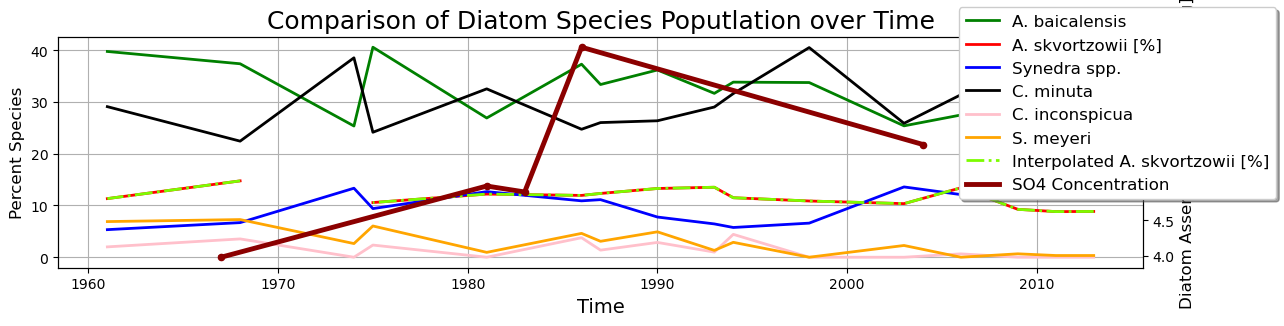

In [43]:
fig,ax = plt.subplots(figsize=(14,3))

ax2 = ax.twinx()

ax.plot(dates_dia_tot, dia_ab, c='green', linestyle='-', linewidth=2, marker=None, label= 'A. baicalensis')
ax.plot(dates_dia_tot, dia_as, c='red', linestyle='-', linewidth=2, marker=None, label= 'A. skvortzowii [%]')
ax.plot(dates_dia_tot, dia_ss, c='blue', linestyle='-', linewidth=2, marker=None, label= 'Synedra spp.')
ax.plot(dates_dia_tot, dia_cm, c='k', linestyle='-', linewidth=2, marker=None, label= 'C. minuta')
ax.plot(dates_dia_tot, dia_ci, c='pink', linestyle='-', linewidth=2, marker=None, label= 'C. inconspicua')
ax.plot(dates_dia_tot, dia_sm, c='orange', linestyle='-', linewidth=2, marker=None, label= 'S. meyeri')
ax.plot(dates_dia_tot, dia_as_interp, c='lawngreen', linestyle='-.', linewidth=2, marker=None, label= 'Interpolated A. skvortzowii [%]')


list2 = ax2.plot(so4_final_date, so4_final_conc, c='darkred', linestyle='-', linewidth=3.5, marker=None,label = 'SO4 Concentration')
ax2.scatter(so4_final_date, so4_final_conc, s=20, c='darkred')

ax.grid()

ax.set_title('Comparison of Diatom Species Poputlation over Time', fontsize=18)
ax.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Diatom Assemblage Total,[10^6 #/g]', fontsize=12)
ax.set_ylabel('Percent Species', fontsize=12)

fig.legend(shadow=True, fontsize='large')